In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mplsoccer import Pitch,VerticalPitch
import warnings
warnings.filterwarnings("ignore")

In [7]:
allshots=pd.read_csv('allshots.csv')

In [8]:
messi_shots = allshots.loc[(allshots['playerId']==3359)&(allshots['competition']==5)]
messi_shots_goals=messi_shots.loc[messi_shots['goal']==1]
messi_shots_notgoals=messi_shots.loc[messi_shots['goal']==0]

In [9]:
messi_cum_xG=np.around(messi_shots['xG'].sum(),4)
messi_goals=(messi_shots['goal'].sum()).astype(int)

In [10]:
from mplsoccer import Pitch, VerticalPitch

Text(24, 62, 'Goals - 26')

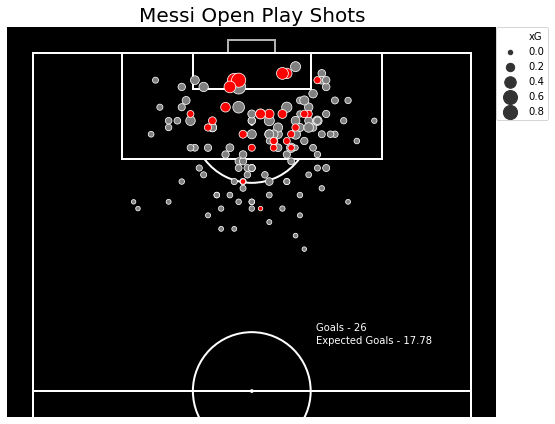

In [11]:
pitch = VerticalPitch(pitch_type='custom',half=True, goal_type='box', line_color='white', pitch_color='black', linewidth=2,pitch_length=105, pitch_width=68, constrained_layout=True)

pitch.draw(figsize=(8,6))
sns.scatterplot(data=messi_shots_notgoals, y='x_coordinates', x='y_coordinates', size='xG', sizes=(20,200), alpha=1, color='gray',legend=False)
sns.scatterplot(data=messi_shots_goals, y='x_coordinates', x='y_coordinates', size='xG', sizes=(20,200), alpha=1,color='red')
plt.legend( bbox_to_anchor=(1.0,1),borderaxespad=0)
plt.title('Messi Open Play Shots', fontsize=20)
plt.annotate("Expected Goals - 17.78", (24,60),color='white')
plt.annotate("Goals - 26", (24,62),color='white')



In [13]:
def shotsmapdata(id,competition,allshots):
    shots = allshots.loc[(allshots['playerId']==id)&(allshots['competition']==competition)]
    shots_goals=shots.loc[shots['goal']==1]
    shots_notgoals=shots.loc[shots['goal']==0]
    return shots_goals, shots_notgoals

In [14]:
salah_goals, salah_notgoals = shotsmapdata(120353,0,allshots)

Text(24, 62, 'Goals - 31')

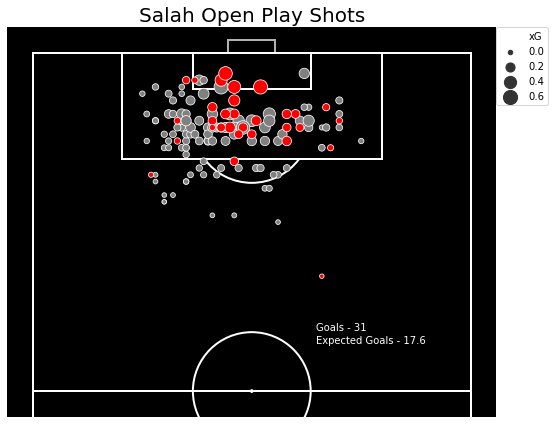

In [15]:

pitch = VerticalPitch(pitch_type='custom',half=True, goal_type='box', line_color='white', pitch_color='black', linewidth=2,pitch_length=105, pitch_width=68, constrained_layout=True)
pitch.draw(figsize=(8,6))
sns.scatterplot(data=salah_notgoals, y='x_coordinates', x='y_coordinates', size='xG', sizes=(20,200), alpha=1, color='gray',legend=False)
sns.scatterplot(data=salah_goals, y='x_coordinates', x='y_coordinates', size='xG', sizes=(20,200), alpha=1,color='red')
plt.legend( bbox_to_anchor=(1.0,1),borderaxespad=0)
plt.title('Salah Open Play Shots', fontsize=20)
plt.annotate("Expected Goals - 17.6", (24,60),color='white')
plt.annotate("Goals - 31", (24,62),color='white')

In [16]:
worldcup_shots=pd.read_csv('worldcup_shots.csv')

In [17]:
worldcup_final=worldcup_shots.loc[worldcup_shots['matchId']==2058017]

In [18]:
worldcup_final_france = worldcup_final.loc[worldcup_final['teamId']==4418]
worldcup_final_croatia = worldcup_final.loc[worldcup_final['teamId']==9598]

In [19]:
worldcup_final_croatia['x_coordinates'] = 105-worldcup_final_croatia['x_coordinates']

Text(55, 20, 'Croatia')

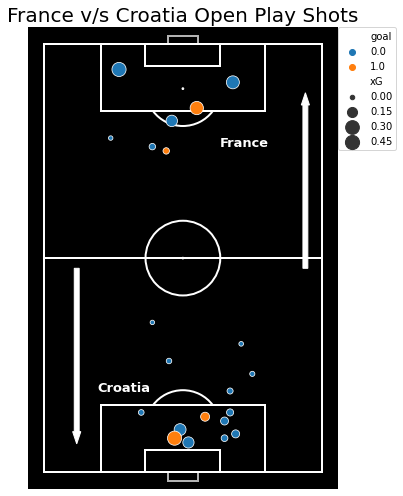

In [21]:
pitch = VerticalPitch(pitch_type='custom',half=False, goal_type='box', line_color='white', pitch_color='black', linewidth=2,pitch_length=105, pitch_width=68, constrained_layout=True)
pitch.draw(figsize=(12,7))
sns.scatterplot(data=worldcup_final_france, y='x_coordinates', x='y_coordinates', size='xG', sizes=(20,200), hue='goal',alpha=1, color='red',legend=False)
sns.scatterplot(data=worldcup_final_croatia, y='x_coordinates', x='y_coordinates', size='xG', sizes=(20,200),hue='goal',alpha=1,color='red')
plt.legend( bbox_to_anchor=(1.0,1),borderaxespad=0)
plt.title('France v/s Croatia Open Play Shots', fontsize=20)
plt.arrow(4, 50, 0, 40, 
          head_width = 2, 
          width = 1.2, color='white')
plt.arrow(60, 50, 0, -40, 
          head_width = 2, 
          width = 1.2, color='white')
plt.annotate("France", (25,80),color='white', fontsize=13, weight='bold')
plt.annotate("Croatia", (55,20),color='white', fontsize=13, weight='bold')
